# **Importing Required Libraries**
Import the required libraries for the project to the Colab environment.
Import Pandas, NumPy, Seaborn, Matplotlib, Sklearn and Tensorflow libraries for
data analysis



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import cv2
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')
AUTO = tf.data.experimental.AUTOTUNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preprocessing**
In this section, prepare the data you have, for training the model.
Create a dataframe that includes pixel values of images and the labels
Use Label Encoding or One-Hot Encoding techniques to deal with categorical
targets.
Split your dataset into X_train,X_test, X_val, y_train, y_test and y_val
Normalize the pixel values.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dog_breed_classification/labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
print(f'Shape     : {df.shape}\n'
      f'Size      : {df.size}\n'
      f'Dimension : {df.ndim}')

Shape     : (10222, 2)
Size      : 20444
Dimension : 2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [6]:
df.describe().T

,count,unique,top,freq
id,10222,10222,000bec180eb18c7604dcecc8fe0dba07,1
breed,10222,120,scottish_deerhound,126


In [7]:
df["breed"].nunique()

120

In [8]:
df.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

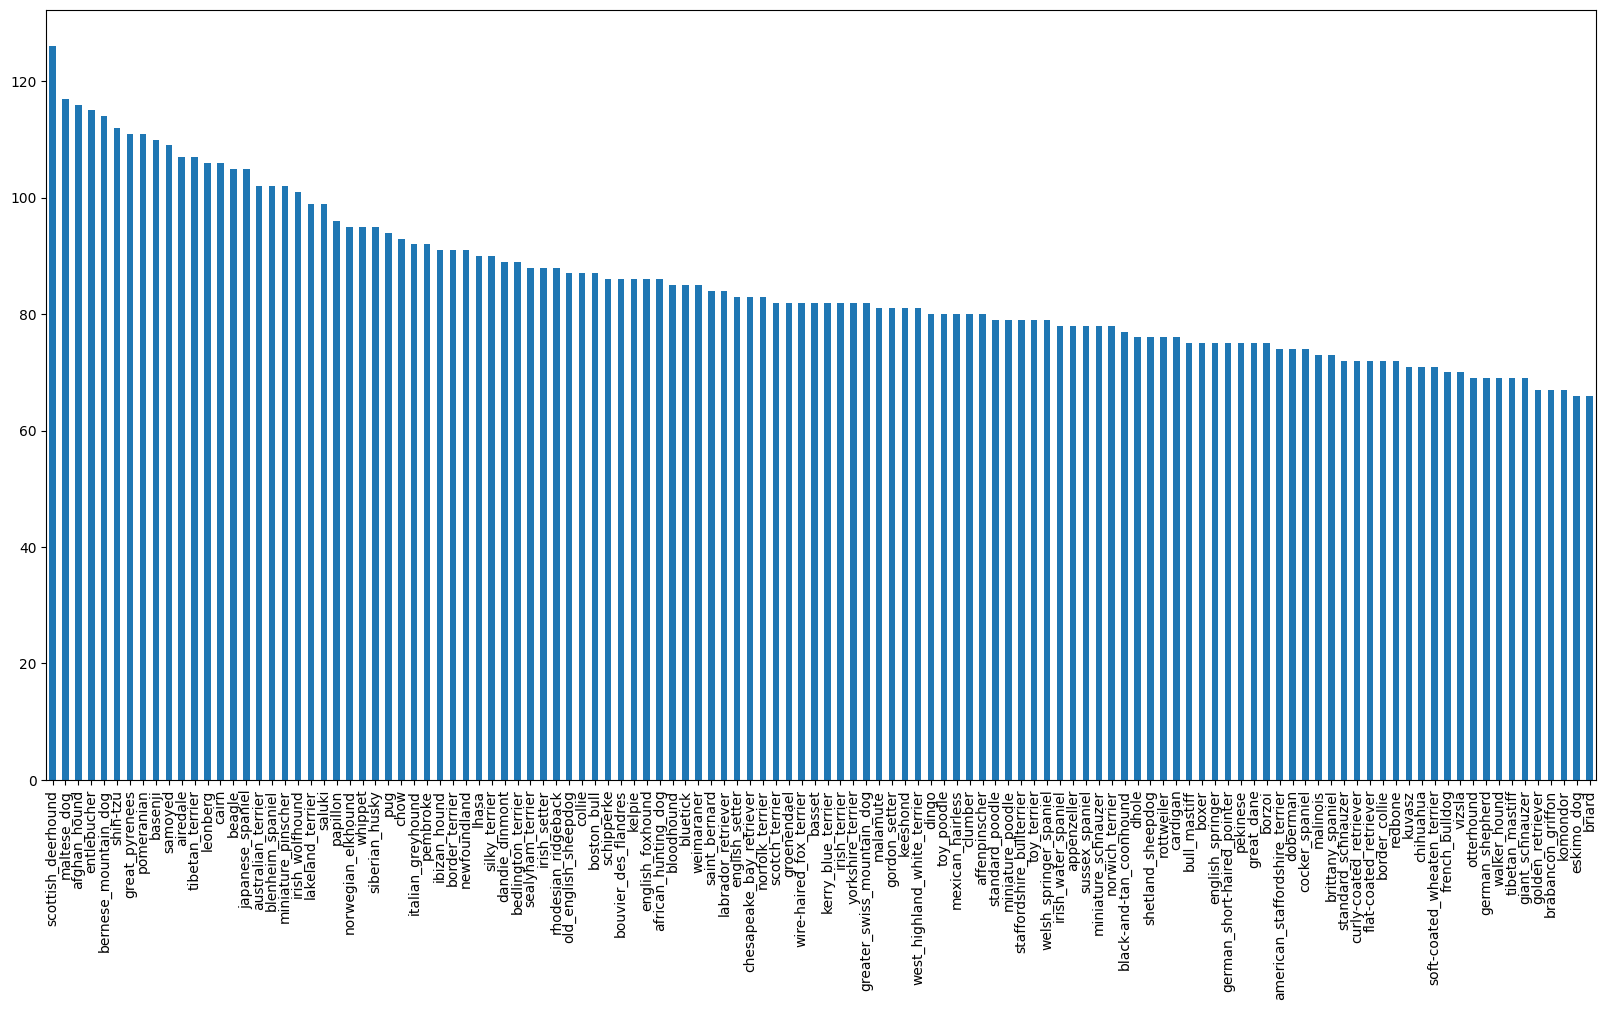

In [9]:
plt.figure(figsize=(20, 10))
df['breed'].value_counts().plot.bar()
plt.show()

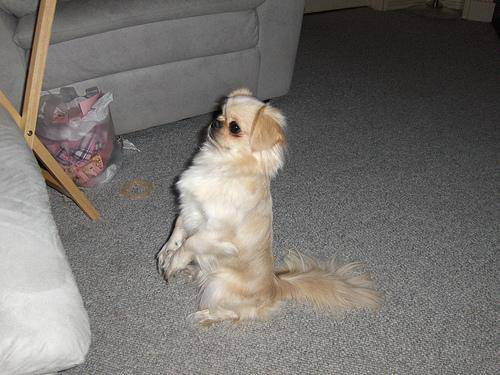

In [10]:
from IPython.display import display, Image
Image("/content/drive/MyDrive/dog_breed_classification/train/001cdf01b096e06d78e9e5112d419397.jpg")

In [11]:
df = df.head(2000)

In [12]:
# Create a dataframe that includes pixel values of images and the labels
df['filepath'] = '/content/drive/MyDrive/dog_breed_classification/train/' + df['id'] + '.jpg'
df.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,/content/drive/MyDrive/dog_breed_classificatio...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,/content/drive/MyDrive/dog_breed_classificatio...
2,001cdf01b096e06d78e9e5112d419397,pekinese,/content/drive/MyDrive/dog_breed_classificatio...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,/content/drive/MyDrive/dog_breed_classificatio...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,/content/drive/MyDrive/dog_breed_classificatio...


In [13]:
# Use Label Encoding or One-Hot Encoding techniques to deal with categorical targets
le = LabelEncoder()
df['breed'] = le.fit_transform(df['breed'])
df.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,19,/content/drive/MyDrive/dog_breed_classificatio...
1,001513dfcb2ffafc82cccf4d8bbaba97,37,/content/drive/MyDrive/dog_breed_classificatio...
2,001cdf01b096e06d78e9e5112d419397,85,/content/drive/MyDrive/dog_breed_classificatio...
3,00214f311d5d2247d5dfe4fe24b2303d,15,/content/drive/MyDrive/dog_breed_classificatio...
4,0021f9ceb3235effd7fcde7f7538ed62,49,/content/drive/MyDrive/dog_breed_classificatio...


In [14]:
# Split your dataset into X_train,X_test, X_val, y_train, y_test and y_va
X = df['filepath']
y = df['breed']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=42) #Splitting data.


In [31]:
# Create the validation datasets
# and assign the last 1600 images of X_train and y_train
X_val = X_train[1600:]
y_val = y_train[1600:]

# Create new train datasets
# and assign the first 1600 images of X_train and y_train
X_train = X_train[:1600]
y_train = y_train[:1600]

In [16]:
# Print the lengths of the each dataset
print(f'X_train: {len(X_train)}')
print(f'X_val: {len(X_val)}')
print(f'X_test: {len(X_test)}')

X_train: 1600
X_val: 200
X_test: 200


In [17]:
X_train_data = []
for file_path in X_train:
    img = cv2.imread(file_path)
    img = cv2.resize(img, (224, 224))
    X_train_data.append(img)

X_train = np.array(X_train_data)
y_train = np.array(y_train)

In [18]:
X_val_data = []
for file_path in X_val:
    img = cv2.imread(file_path)
    img = cv2.resize(img, (224, 224))
    X_val_data.append(img)

X_val = np.array(X_val_data)
y_val = np.array(y_val)

In [19]:
X_test_data = []
for file_path in X_test:
    img = cv2.imread(file_path)
    img = cv2.resize(img, (224, 224))
    X_test_data.append(img)

X_test = np.array(X_test_data)
y_test = np.array(y_test)

In [20]:
# Normalize pixel values
X_train = X_train / 255.0
X_val = X_val / 255.
X_test = X_test / 255.0

# **Building a Model**
Build a model using Tensorflow or Pytorch
Your model should include Conv2D, MaxPooling2D, Flatten, Dense and
Dropout.(Number of layers is up to you)
Compile your model and print the summary of the model.
Train your model using train and validation subsets
Plot model’s accuracy, validation accuracy, loss and validation loss.

In [21]:
# Create a model object
model = tf.keras.Sequential()

In [22]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [23]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [24]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [25]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [26]:
# Add the output layer
model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [27]:
# Compile the model
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Train the model for 20 epochs with batch size of 64

results = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
50/50 [==============================] - 17s 66ms/step - loss: 4.8752 - accuracy: 0.0069 - val_loss: 4.7909 - val_accuracy: 0.0150
Epoch 2/30
50/50 [==============================] - 3s 56ms/step - loss: 4.7855 - accuracy: 0.0069 - val_loss: 4.7951 - val_accuracy: 0.0050
Epoch 3/30
50/50 [==============================] - 3s 62ms/step - loss: 4.7821 - accuracy: 0.0119 - val_loss: 4.8313 - val_accuracy: 0.0150
Epoch 4/30
50/50 [==============================] - 3s 58ms/step - loss: 4.7739 - accuracy: 0.0125 - val_loss: 4.7992 - val_accuracy: 0.0050
Epoch 5/30
50/50 [==============================] - 3s 54ms/step - loss: 4.7565 - accuracy: 0.0144 - val_loss: 4.8212 - val_accuracy: 0.0100
Epoch 6/30
50/50 [==============================] - 3s 54ms/step - loss: 4.6979 - accuracy: 0.0269 - val_loss: 4.8026 - val_accuracy: 0.0200
Epoch 7/30
50/50 [==============================] - 3s 54ms/step - loss: 4.5734 - accuracy: 0.0388 - val_loss: 4.8229 - val_accuracy: 0.0200
Epoch 8/30
5

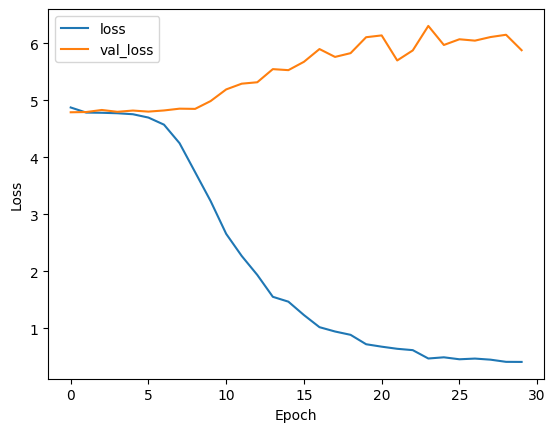

In [29]:
# Plot the the training loss
plt.plot(results.history['loss'], label='loss')
# Plot the the validation loss
plt.plot(results.history['val_loss'], label='val_loss')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Put legend table
plt.legend()

# Show the plot
plt.show()

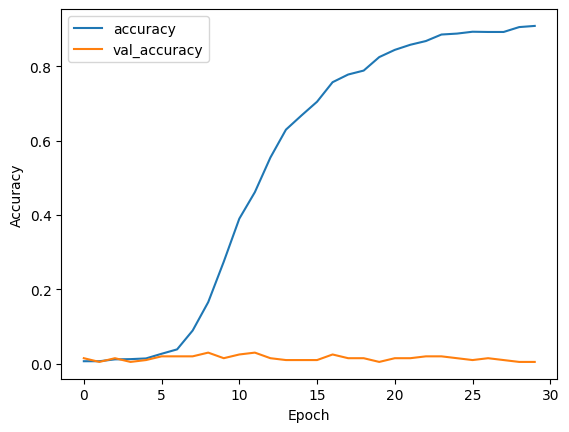

In [30]:
# Plot the the training accuracy
plt.plot(results.history['accuracy'], label='accuracy')

# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label='val_accuracy')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Put legend table
plt.legend()

# Show the plot
plt.show()